# Homework 2
## EE 399
## Professor Nathan Kutz
## By: Gerin George

In [10]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
results=loadmat('yalefaces.mat')
X=results['X']

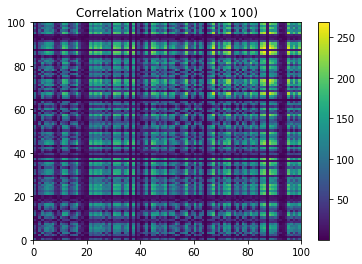

In [11]:
# Part A

# Compute the correlation matrix using dot product
X_100 = X[:, :100]
C = np.dot(X_100.T, X_100)


# Plot the correlation matrix
fig, ax = plt.subplots()
im = ax.pcolor(C)
fig.colorbar(im)
ax.set_title('Correlation Matrix (100 x 100)')
plt.show()

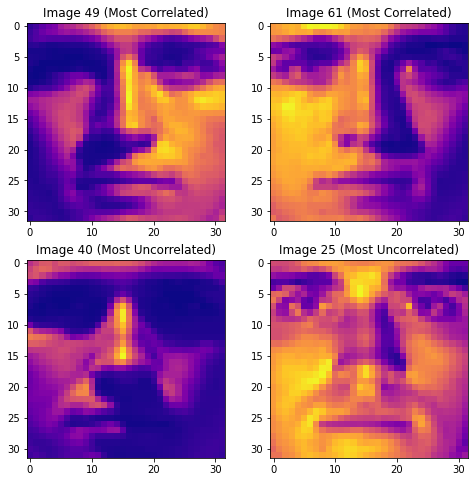

In [12]:
# Part B

# Get indices of upper triangle of C
utri = np.triu_indices(C.shape[0], k=1)

# Find the indices of the most highly correlated images
max_idx = np.unravel_index(np.argmax(C[utri]), C.shape)
img1 = X_100[:, max_idx[0]]
img2 = X_100[:, max_idx[1]]

# Find the indices of the most uncorrelated images
min_idx = np.unravel_index(np.argmin(C[utri]), C.shape)
img3 = X_100[:, min_idx[0]]
img4 = X_100[:, min_idx[1]]

# Plot the four images
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes[0, 0].imshow(img1.reshape((32, 32), order='F').T, cmap = 'plasma')
axes[0, 0].set_title('Image {} (Most Correlated)'.format(max_idx[0]+1))
axes[0, 1].imshow(img2.reshape((32, 32), order='F').T, cmap = 'plasma')
axes[0, 1].set_title('Image {} (Most Correlated)'.format(max_idx[1]+1))
axes[1, 0].imshow(img3.reshape((32, 32), order='F').T, cmap = 'plasma')
axes[1, 0].set_title('Image {} (Most Uncorrelated)'.format(min_idx[0]+1))
axes[1, 1].imshow(img4.reshape((32, 32), order='F').T, cmap = 'plasma')
axes[1, 1].set_title('Image {} (Most Uncorrelated)'.format(min_idx[1]+1))
plt.show()


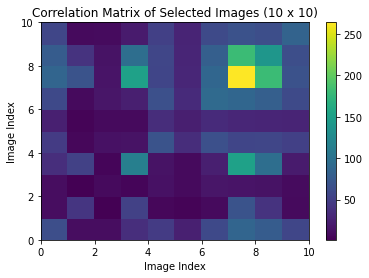

In [13]:
# Part C
# compute the correlation matrix
C = np.dot(X[:, [0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004]].T, X[:, [0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004]])

# plot the correlation matrix
fig, ax = plt.subplots()
pcm = ax.pcolor(C)
ax.set_title('Correlation Matrix of Selected Images (10 x 10)')
ax.set_xlabel('Image Index')
ax.set_ylabel('Image Index')
fig.colorbar(pcm, ax=ax)
plt.show()

In [14]:
# Part D
Y = np.dot(X, X.T)
eigenvals, eigenvecs = np.linalg.eigh(Y)

# Get the indices that sort the eigenvalues in descending order
idx = np.argsort(eigenvals)[::-1]

# Get the top 6 eigenvectors
top_eigenvecs = eigenvecs[:, idx[:6]]

# Normalize the eigenvectors
norms = np.linalg.norm(top_eigenvecs, axis=0)
normalized_eigenvecs = top_eigenvecs / norms

# Print the first six eigenvectors
for i in range(6):
    print(f"Eigenvector {i+1}:")
    print(normalized_eigenvecs[:, i])
    print()


Eigenvector 1:
[-0.02384327 -0.02576146 -0.02728448 ... -0.02082937 -0.0193902
 -0.0166019 ]

Eigenvector 2:
[ 0.04535378  0.04567536  0.04474528 ... -0.03737158 -0.03557383
 -0.02965746]

Eigenvector 3:
[-0.05653196 -0.04709124 -0.0362807  ... -0.06455006 -0.06196898
 -0.05241684]

Eigenvector 4:
[ 0.04441826  0.05057969  0.05522219 ... -0.01006919 -0.00355905
  0.00040934]

Eigenvector 5:
[-0.03378603 -0.01791442 -0.00462854 ...  0.06172201  0.05796353
  0.05757412]

Eigenvector 6:
[0.02207542 0.03378819 0.04487476 ... 0.03025485 0.02850199 0.00941028]



In [15]:
# Part E
# SVD of X
U, s, V = np.linalg.svd(X)

# Principal component directions are columns of Vt
principal_component_directions = V[:6,:].T

# Print the first six principal component directions
for i, direction in enumerate(principal_component_directions.T):
    print(f"Principal Component Direction {i+1}:")
    print(direction)
    print("\n")

Principal Component Direction 1:
[-0.01219331 -0.00215188 -0.01056679 ... -0.02177117 -0.03015309
 -0.0257889 ]


Principal Component Direction 2:
[-0.01938848 -0.00195186  0.02471869 ...  0.04027773  0.00219562
  0.01553129]


Principal Component Direction 3:
[ 0.01691206  0.00143586  0.0384465  ...  0.01340245 -0.01883373
  0.00643709]


Principal Component Direction 4:
[ 0.0204079  -0.01201431  0.00397553 ... -0.01641295 -0.04011563
  0.02679029]


Principal Component Direction 5:
[-0.01902342  0.00418948  0.0384026  ... -0.01092512  0.00087341
  0.01260435]


Principal Component Direction 6:
[-0.0090084  -0.00624237  0.01580824 ... -0.00977639  0.00090316
  0.00304479]




In [16]:
# Part F
eigenvector_1 = normalized_eigenvecs[:, 0]
svd_mode_1 = U[:, 0]
norm_diff = np.linalg.norm(np.abs(eigenvector_1) - np.abs(svd_mode_1))
print("Norm of absolute difference between eigenvector 1 and SVD mode 1: ", norm_diff)


Norm of absolute difference between eigenvector 1 and SVD mode 1:  6.125883123259166e-16


Variances: 
SVD Mode 1: 72.9276
SVD Mode 2: 15.2818
SVD Mode 3: 2.5667
SVD Mode 4: 1.8775
SVD Mode 5: 0.6393
SVD Mode 6: 0.5924


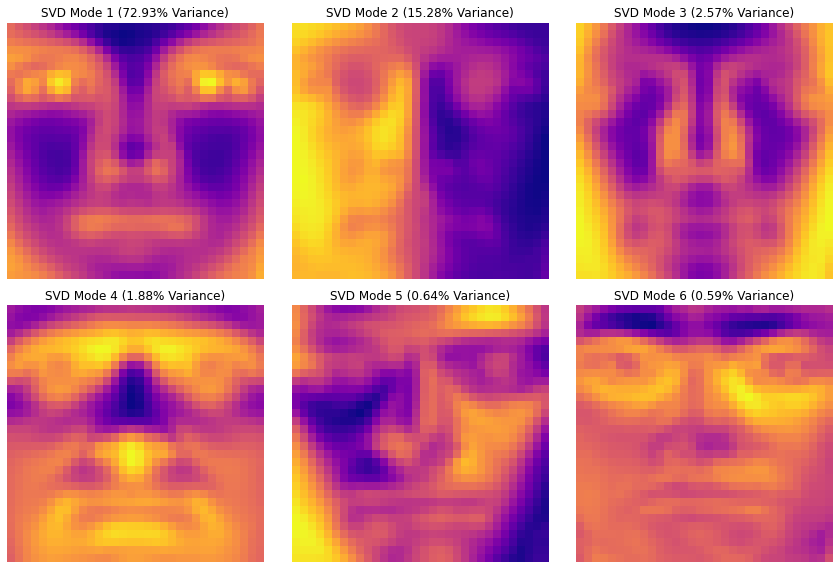

In [17]:
# Part G
# Compute the sum of squares of the projections onto each of the 6 SVD modes
ss_projections = np.sum((X.T @ U[:, :6])**2, axis=0)

# Compute the total sum of squares of the original data
total_variance = np.sum(X**2)

# Compute the percentage of variance captured by each of the first 6 SVD modes
variance_percentages = ss_projections / total_variance * 100
print('Variances: ')
for i in range(6):
    print(f'SVD Mode {i+1}: {variance_percentages[i]:.4f}')

# Plot the first 6 SVD modes
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()
for i in range(6):
    axs[i].imshow(np.reshape(U[:, i], (32, 32)), cmap='plasma')
    axs[i].set_title(f'SVD Mode {i+1} ({variance_percentages[i]:.2f}% Variance)')
    axs[i].axis('off')
plt.tight_layout()
plt.show()
